# Demo of a Log-normal mock

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nbodykit 
import nbodykit.lab as nb
import numpy as np
from nbodykit.cosmology import Planck15
from nbodykit import setup_logging
setup_logging() # turn on logging to screen
nbodykit.__version__

'0.3.13'

In [2]:
BIAS     = 1.5
BOX      = 5274      # Mpc/h
NMESH    = 256
redshift = 0.85     
NBAR     = 1.947e-4 # h3/Mpc3
SEED     = 12345
cosmo    = nb.cosmology.Planck15
Plin     = nb.cosmology.LinearPower(cosmo, redshift, transfer='CLASS')

# generate the catalog
cat      = nb.LogNormalCatalog(Plin=Plin, nbar=NBAR, BoxSize=BOX,
                               Nmesh=NMESH, bias=BIAS, seed=SEED)

[ 000003.32 ]   0: 08-15 11:09  LogNormalCatalog INFO     Growth Rate is 0.844759
[ 000003.32 ]   0: 08-15 11:09  LogNormalCatalog INFO     Generating whitenoise
[ 000007.01 ]   0: 08-15 11:09  LogNormalCatalog INFO     Write noise generated
[ 000043.44 ]   0: 08-15 11:09  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000044.09 ]   0: 08-15 11:09  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 0.4392021988688598
[ 000045.88 ]   0: 08-15 11:09  LogNormalCatalog INFO     Displacement computed in configuration space: std = [3.4609702907412476, 3.4552923107014517, 3.4606790209276377]
[ 000045.89 ]   0: 08-15 11:09  LogNormalCatalog INFO     gaussian field is generated
[ 000046.00 ]   0: 08-15 11:09  LogNormalCatalog INFO     Lognormal transformation done
[ 000048.21 ]   0: 08-15 11:09  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 28552660
[ 000054.00 ]   0: 08-15 11:09  LogNormalCatalog INFO     catalog produ

In [3]:
cat.attrs

{'transfer': 'CLASS',
 'cosmo': {'output': 'vTk dTk mPk',
  'extra metric transfer functions': 'y',
  'n_s': 0.9667,
  'gauge': 'synchronous',
  'N_ur': 2.0328,
  'h': 0.6774,
  'ln10^{10}A_s': 3.064,
  'k_pivot': 0.05,
  'tau_reio': 0.066,
  'T_cmb': 2.7255,
  'Omega_cdm': 0.2589,
  'Omega_b': 0.0486,
  'Omega_k': 0.0,
  'N_ncdm': 1,
  'm_ncdm': [0.06],
  'P_k_max_h/Mpc': 10.0,
  'z_max_pk': 100.0},
 'redshift': 0.85,
 'sigma8': 0.8158115899311432,
 'nbar': 0.0001947,
 'bias': 1.5,
 'unitary_amplitude': False,
 'inverted_phase': False,
 'seed': 12345,
 'Nmesh': array([256, 256, 256]),
 'BoxSize': array([5274., 5274., 5274.])}

In [4]:
cat.columns

['Position', 'Selection', 'Value', 'Velocity', 'VelocityOffset', 'Weight']

In [5]:
cat['Position'].shape

(28552660, 3)

In [6]:
pos = cat['Position'].compute()

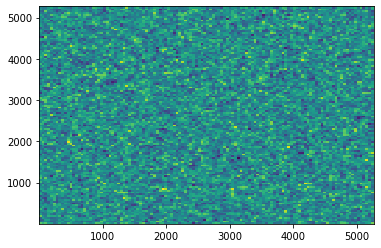

In [7]:
plt.hist2d(pos[:,0], pos[:,1], bins=120);plt.show()

## Compute the Power Spectrum

In [8]:
mesh = cat.to_mesh(compensated=True, resampler='cic', 
                   position='Position', BoxSize=BOX, Nmesh=256)
rpol = nb.FFTPower(mesh, mode='1d', poles=[0])

[ 000093.15 ]   0: 08-15 11:10  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 28552660 
[ 000094.89 ]   0: 08-15 11:10  CatalogMesh     INFO     painted 4194304 out of 28552660 objects to mesh
[ 000094.89 ]   0: 08-15 11:10  CatalogMesh     INFO     Chunk 4194304 ~ 8388608 / 28552660 
[ 000096.53 ]   0: 08-15 11:10  CatalogMesh     INFO     painted 8388608 out of 28552660 objects to mesh
[ 000096.53 ]   0: 08-15 11:10  CatalogMesh     INFO     Chunk 8388608 ~ 12582912 / 28552660 
[ 000098.16 ]   0: 08-15 11:10  CatalogMesh     INFO     painted 12582912 out of 28552660 objects to mesh
[ 000098.16 ]   0: 08-15 11:10  CatalogMesh     INFO     Chunk 12582912 ~ 16777216 / 28552660 
[ 000099.78 ]   0: 08-15 11:10  CatalogMesh     INFO     painted 16777216 out of 28552660 objects to mesh
[ 000099.78 ]   0: 08-15 11:10  CatalogMesh     INFO     Chunk 16777216 ~ 20971520 / 28552660 
[ 000101.41 ]   0: 08-15 11:10  CatalogMesh     INFO     painted 20971520 out of 28552660 objects to mesh
[ 000101

In [9]:
rpol.attrs

{'Nmesh': array([256, 256, 256]),
 'BoxSize': array([5274., 5274., 5274.]),
 'Lx': 5274.0,
 'Ly': 5274.0,
 'Lz': 5274.0,
 'volume': 146696710824.0,
 'mode': '1d',
 'los': [0, 0, 1],
 'Nmu': 1,
 'poles': [0],
 'dk': 0.001191351025252102,
 'kmin': 0.0,
 'kmax': None,
 'N1': 28552660,
 'N2': 28552660,
 'shotnoise': 5137.759873300772}

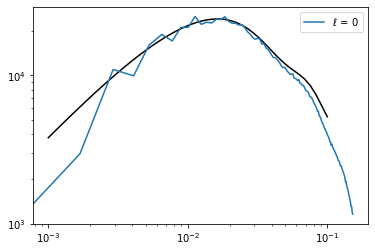

In [12]:
krange = np.logspace(-3, -1)
plt.plot(krange, BIAS**2*Plin(krange), 'k-')
for i in [0]:
    plt.loglog(rpol.poles['k'], rpol.poles['power_'+str(i)].real -rpol.attrs['shotnoise'],
               label=r'$\ell$ = %d'%i)
plt.legend()